# –ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö
## –ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ñ–∞–π–ª–∞ `Nauka_4.xlsx`, –≤–∫–ª—é—á–∞—è:
- –û–ø–∏—Å–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
- –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –∏ –≥—Ä–∞—Ñ–∏–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
- –†–∞—Å—á—ë—Ç —á–∏—Å–ª–æ–≤—ã—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫
- –ü—Ä–æ–≤–µ—Ä–∫—É –≥–∏–ø–æ—Ç–µ–∑—ã –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏
- –î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã

## –ò–º–ø–æ—Ä—Ç –∏ —É—Å—Ç–∞–Ω–æ–≤–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [140]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.nonparametric.kde import KDEUnivariate
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['axes.grid'] = True


## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
–ó–∞–≥—Ä—É–∑–∏—Ç–µ –≤–∞—à —Ñ–∞–π–ª `Nauka_4.xlsx` –∏–ª–∏ `Nauka_4.csv` —á–µ—Ä–µ–∑ –ø–∞–Ω–µ–ª—å —Ñ–∞–π–ª–æ–≤ Google¬†Colab (—Å–ª–µ–≤–∞) –∏ —É–∫–∞–∂–∏—Ç–µ –ø—É—Ç—å –Ω–∏–∂–µ.

In [141]:
# –ö–æ–ø–∏—è –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
df_clean = df.copy()

# –£–±–∏—Ä–∞–µ–º —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –Ω–µ—Ç —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö (—Å–ª—É–∂–µ–±–Ω—ã–µ –∏ –ø—Ä–∏–º–µ—á–∞–Ω–∏—è)
mask = df_clean.iloc[:, 1:].notna().any(axis=1)
df_clean = df_clean[mask]

# –§–∏–ª—å—Ç—Ä—É–µ–º —Ç–æ–ª—å–∫–æ –Ω—É–∂–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏ (–∏—Å–∫–ª—é—á–∞–µ–º "–≤ —Ç–æ–º —á–∏—Å–ª–µ", "–≤ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö" –∏ –ø—Ä–∏–º–µ—á–∞–Ω–∏—è)
df_clean = df_clean[~df_clean["–ü–æ–∫–∞–∑–∞—Ç–µ–ª—å"].str.contains("–≤ —Ç–æ–º —á–∏—Å–ª–µ|–≤ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö|1\\)|2\\)", case=False, regex=True)]

# –ß–∏—Å—Ç–∏–º –Ω–∞–∑–≤–∞–Ω–∏—è –≥–æ–¥–æ–≤ (—É–±–∏—Ä–∞–µ–º –∑–∞–ø—è—Ç—ã–µ, —Ç–æ—á–∫–∏, –Ω—É–ª–∏ –∏ –ø—Ä–∏–≤–æ–¥–∏–º –∫ int)
df_clean.columns = [df_clean.columns[0]] + [int(str(c).replace(',', '').replace('.', '').strip()) for c in df_clean.columns[1:]]

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —á–∏—Å–ª–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ float
for col in df_clean.columns[1:]:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

corrected_columns = [df_clean.columns[0]]

for c in df_clean.columns[1:]:
    c_str = str(c)
    if len(c_str) == 5 and c_str.endswith("0"):
        corrected_columns.append(int(c_str[:-1]))
    else:
        corrected_columns.append(int(c_str))

df_clean.columns = corrected_columns
df_clean = df_clean.reset_index(drop=True)

display(df_clean)


–ü–æ–∫–∞–∑–∞—Ç–µ–ª—å       2000       2005  \
0  –†–∞—Å—Ö–æ–¥—ã  –Ω–∞ –≥—Ä–∞–∂–¥–∞–Ω—Å–∫—É—é –Ω–∞—É–∫—É –∏–∑ \n—Å—Ä–µ–¥—Å—Ç–≤ —Ñ–µ–¥... 17,396.400 76,909.300   
1                    –Ω–∞ —Ñ—É–Ω–¥–∞–º–µ–Ω—Ç–∞–ª—å–Ω—ã–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è  8,219.300 32,025.100   
2                 –Ω–∞ –ø—Ä–∏–∫–ª–∞–¥–Ω—ã–µ –Ω–∞—É—á–Ω—ã–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è  9,177.100 44,884.200   
3                    –∫ —Ä–∞—Å—Ö–æ–¥–∞–º —Ñ–µ–¥–µ—Ä–∞–ª—å–Ω–æ–≥–æ –±—é–¥–∂–µ—Ç–∞      1.690      2.190   

         2010        2011        2012        2013        2014        2015  \
0 237,644.000 313,899.300 355,921.100 425,301.700 437,273.300 439,392.800   
1  82,172.000  91,684.500  86,623.200 112,230.900 121,599.500 120,203.800   
2 155,472.000 222,214.800 269,297.900 313,070.800 315,673.800 319,188.900   
3       2.350       2.870       2.760       3.190       2.950       2.810   

         2016        2017        2018        2019        2020        2021  \
0 402,722.300 377,882.200 420,472.300         NaN 549,602.200 626,574.300   
1 105,247.600 116,977.600 149,550.000 192,495.000 203,246.800 225,152.700   
2 297,474.700 260,904.600 270,922.300 296,663.100 346,355.400 401,421.600   
3       2.450       2.300       2.520       2.690       2.410       2.530   

         2022        2023        2024  
0 631,701.600 691,758.900 716,858.000  
1 247,286.900 244,313.400 268,115.100  
2 384,414.800 447,445.500 448,742.900  
3       2.510       2.760       2.380

## –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å–Ω–æ–≤–Ω–æ–π —á–∏—Å–ª–æ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

In [142]:
num_col = None
for c in df.columns:
    if pd.api.types.is_numeric_dtype(df[c]):
        num_col = c
        break
if num_col is None:
    raise ValueError("‚ùå –ù–µ –Ω–∞–π–¥–µ–Ω —á–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü.")
print(f"–ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è: {num_col}")

data = df[num_col].dropna().astype(float)
n = len(data)


–ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è: 2000.0


## –û—Å–Ω–æ–≤–Ω—ã–µ —á–∏—Å–ª–æ–≤—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –¥–∞–Ω–Ω—ã—Ö

In [143]:
mean = data.mean()
median = data.median()
var = data.var(ddof=1)
std = data.std(ddof=1)
q1, q3 = data.quantile([0.25, 0.75])
iqr = q3 - q1
skew = data.skew()
kurt = data.kurtosis()

summary = pd.DataFrame({
    "–ß–∏—Å–ª–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π n": [n],
    "–°—Ä–µ–¥–Ω–µ–µ": [mean],
    "–ú–µ–¥–∏–∞–Ω–∞": [median],
    "–î–∏—Å–ø–µ—Ä—Å–∏—è": [var],
    "–°—Ç. –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ": [std],
    "Q1": [q1],
    "Q3": [q3],
    "IQR": [iqr],
    "–ê—Å–∏–º–º–µ—Ç—Ä–∏—è": [skew],
    "–≠–∫—Å—Ü–µ—Å—Å": [kurt]
})
display(summary)


–ß–∏—Å–ª–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π n   –°—Ä–µ–¥–Ω–µ–µ   –ú–µ–¥–∏–∞–Ω–∞      –î–∏—Å–ø–µ—Ä—Å–∏—è  –°—Ç. –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ  \
0                   5 6,958.946 8,219.300 53,069,036.405       7,284.850   

     Q1        Q3       IQR  –ê—Å–∏–º–º–µ—Ç—Ä–∏—è  –≠–∫—Å—Ü–µ—Å—Å  
0 1.690 9,177.100 9,175.410       0.513   -0.640

## –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

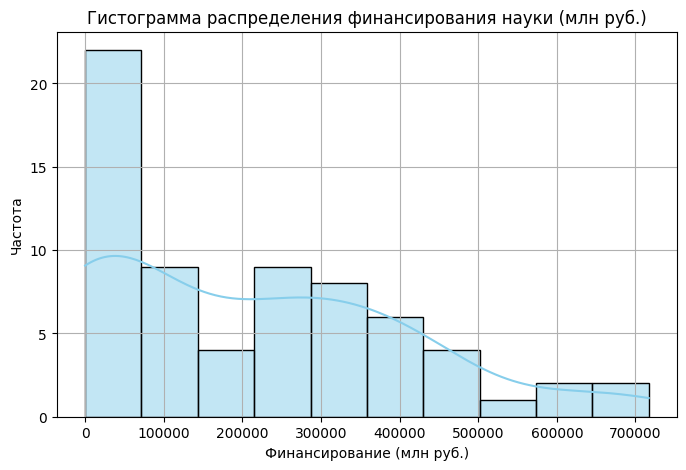

In [144]:
df_long = df_clean.melt(id_vars="–ü–æ–∫–∞–∑–∞—Ç–µ–ª—å", var_name="–ì–æ–¥", value_name="–ó–Ω–∞—á–µ–Ω–∏–µ")

data_long = df_long['–ó–Ω–∞—á–µ–Ω–∏–µ'].dropna()

plt.figure(figsize=(8,5))
sns.histplot(data_long, bins=10, kde=True, color='skyblue')
plt.title("–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–∞—É–∫–∏ (–º–ª–Ω —Ä—É–±.)")
plt.xlabel("–§–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏–µ (–º–ª–Ω —Ä—É–±.)")
plt.ylabel("–ß–∞—Å—Ç–æ—Ç–∞")
plt.show()



## –ü—Ä–æ–≤–µ—Ä–∫–∞ –≥–∏–ø–æ—Ç–µ–∑—ã –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ (–®–∞–ø–∏—Ä–æ, –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤-–°–º–∏—Ä–Ω–æ–≤)

In [145]:
sh_stat, sh_p = stats.shapiro(data)
ks_stat, ks_p = stats.kstest((data - data.mean())/data.std(), 'norm')

print("–¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ‚Äì–£–∏–ª–∫–∞: p-value =", round(sh_p,4))
print("–¢–µ—Å—Ç –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞‚Äì–°–º–∏—Ä–Ω–æ–≤–∞: p-value =", round(ks_p,4))

if sh_p > 0.05:
    print("–í—ã–≤–æ–¥: –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±–ª–∏–∑–∫–æ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É.")
else:
    print("–í—ã–≤–æ–¥: –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ.")


–¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ‚Äì–£–∏–ª–∫–∞: p-value = 0.3782
–¢–µ—Å—Ç –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞‚Äì–°–º–∏—Ä–Ω–æ–≤–∞: p-value = 0.9003
–í—ã–≤–æ–¥: –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±–ª–∏–∑–∫–æ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É.


## –î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è (95%)

In [146]:
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
se = std / np.sqrt(n)
ci_low = mean - t_crit * se
ci_high = mean + t_crit * se
print(f"95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Å—Ä–µ–¥–Ω–µ–≥–æ: [{ci_low:.3f}; {ci_high:.3f}]")


95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Å—Ä–µ–¥–Ω–µ–≥–æ: [-2086.390; 16004.282]


## –ü–æ–∏—Å–∫ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –ø—Ä–∞–≤–∏–ª—É 1.5 * IQR

In [147]:
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = data[(data < lower) | (data > upper)]
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤: {len(outliers)}")
if len(outliers) > 0:
    display(outliers.describe())


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤: 0


## –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ–∂–¥—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏

                                          –ü–æ–∫–∞–∑–∞—Ç–µ–ª—å   –ì–æ–¥   –ó–Ω–∞—á–µ–Ω–∏–µ
0  –†–∞—Å—Ö–æ–¥—ã  –Ω–∞ –≥—Ä–∞–∂–¥–∞–Ω—Å–∫—É—é –Ω–∞—É–∫—É –∏–∑ \n—Å—Ä–µ–¥—Å—Ç–≤ —Ñ–µ–¥...  2000 17,396.400
1                    –Ω–∞ —Ñ—É–Ω–¥–∞–º–µ–Ω—Ç–∞–ª—å–Ω—ã–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è  2000  8,219.300
2                 –Ω–∞ –ø—Ä–∏–∫–ª–∞–¥–Ω—ã–µ –Ω–∞—É—á–Ω—ã–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è  2000  9,177.100
3                    –∫ —Ä–∞—Å—Ö–æ–¥–∞–º —Ñ–µ–¥–µ—Ä–∞–ª—å–Ω–æ–≥–æ –±—é–¥–∂–µ—Ç–∞  2000      1.690
4  –†–∞—Å—Ö–æ–¥—ã  –Ω–∞ –≥—Ä–∞–∂–¥–∞–Ω—Å–∫—É—é –Ω–∞—É–∫—É –∏–∑ \n—Å—Ä–µ–¥—Å—Ç–≤ —Ñ–µ–¥...  2005 76,909.300


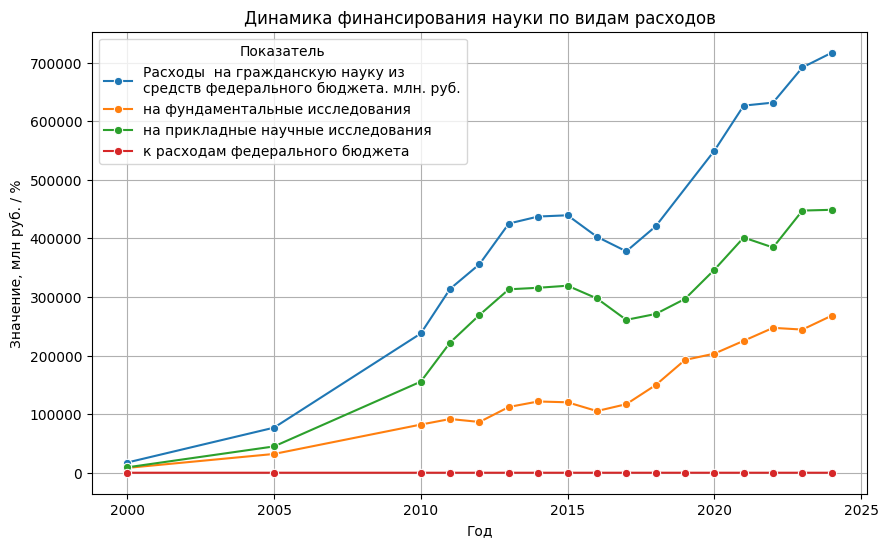

In [148]:
df_long = df_clean.melt(id_vars="–ü–æ–∫–∞–∑–∞—Ç–µ–ª—å", var_name="–ì–æ–¥", value_name="–ó–Ω–∞—á–µ–Ω–∏–µ")

print(df_long.head())

plt.figure(figsize=(10,6))
sns.lineplot(data=df_long, x="–ì–æ–¥", y="–ó–Ω–∞—á–µ–Ω–∏–µ", hue="–ü–æ–∫–∞–∑–∞—Ç–µ–ª—å", marker="o")
plt.title("–î–∏–Ω–∞–º–∏–∫–∞ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–∞—É–∫–∏ –ø–æ –≤–∏–¥–∞–º —Ä–∞—Å—Ö–æ–¥–æ–≤")
plt.ylabel("–ó–Ω–∞—á–µ–Ω–∏–µ, –º–ª–Ω —Ä—É–±. / %")
plt.xlabel("–ì–æ–¥")
plt.grid(True)
plt.show()

## üîü –ò—Ç–æ–≥–æ–≤—ã–µ –≤—ã–≤–æ–¥—ã

In [149]:
print(f"""–û—Å–Ω–æ–≤–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
1. –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {mean:.3f}
2. –ú–µ–¥–∏–∞–Ω–∞: {median:.3f}
3. –ê—Å–∏–º–º–µ—Ç—Ä–∏—è: {skew:.3f}
4. –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏: p(–®–∞–ø–∏—Ä–æ) = {sh_p:.4f}
5. 95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: [{ci_low:.3f}; {ci_high:.3f}]
6. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤: {len(outliers)}
""")

–û—Å–Ω–æ–≤–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
1. –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: 6958.946
2. –ú–µ–¥–∏–∞–Ω–∞: 8219.300
3. –ê—Å–∏–º–º–µ—Ç—Ä–∏—è: 0.513
4. –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏: p(–®–∞–ø–∏—Ä–æ) = 0.3782
5. 95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: [-2086.390; 16004.282]
6. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤: 0

